In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
datadir = os.path.join(os.getcwd(),"Density")

In [3]:
print (datadir)

/media/binsun/49a24cea-f85b-400b-95a7-133633cf22a9/home/binsun/plotfigures/CaMInterplay/Density


In [4]:
Cambr = ["Notarget","WithTarget"]
Linker = ["WTLinker","FlexLinker", "RigidLinker"]
FreeCa = ["0Ca","2Ca","6Ca"]


In [5]:
heavydata = {i:{} for i in Cambr}
waterdata = {i:{} for i in Cambr}
cadata = {i:{} for i in Cambr}


In [6]:
for i in Cambr:
    for j in Linker:
        heavydata[i][j] = {}
        waterdata[i][j] = {}
        cadata[i][j] = {}
        

In [7]:
for i in Cambr:
    for j in Linker:
        for z in FreeCa:
            heavyAtomfile = os.path.join(datadir,i,j,z,'grid.dat')
            waterfile = os.path.join(datadir,i,j,z,'watgrid.dat')
            Cafile = os.path.join(datadir,i,j,z,'cagrid.dat')
            
            heavydata[i][j][z] = np.loadtxt(heavyAtomfile,comments="#",usecols=[3])
            waterdata[i][j][z] = np.loadtxt(waterfile,comments="#",usecols=[3])
            cadata[i][j][z] = np.loadtxt(Cafile,comments="#",usecols=[3])
            

In [8]:
def projection(data,axis="Y"):
    """
    Projection onto XZ plane
    """
    
    # number of grids in each dimension
    nX=150; nY=150; nZ=150
    
    if axis == "Y":
        tdata = np.moveaxis(data,source=1,destination=0)
    elif axis == "Z":
        tdata = np.moveaxis(data,source=2,destination=0)
    else:
        tdata = data

    
    newdata = np.zeros((nY,nZ))
    for i in range(nY):
        for j in range(nZ):
            temp = 0.0
            for k in range(nX):
                temp += tdata[k,j,i]
            newdata[j,i] = temp
            
    return newdata

In [124]:
# Project onto the XZ plane, also record the maximum of all cases
# and normalizd to it

# define dir to store the projected data
Pheavydata = {i:{} for i in Cambr}
Pwaterdata = {i:{} for i in Cambr}
Pcadata = {i:{} for i in Cambr}

for i in Cambr:
    for j in Linker:
        Pheavydata[i][j] = {}
        Pwaterdata[i][j] = {}
        Pcadata[i][j] = {}


heavyMax = 0.0
waterMax = 0.0
caMax = 0.0
for k in Cambr:
    for j in Linker:
        for z in FreeCa:
            if np.max(heavydata[k][j][z]) > heavyMax:
                heavyMax = np.max(heavydata[k][j][z])
        
            if np.max(waterdata[k][j][z]) > waterMax:
                waterMax = np.max(waterdata[k][j][z])
            
            if np.max(cadata[k][j][z]) > caMax:
                caMax = np.max(cadata[k][j][z])
        
            Pheavydata[k][j][z]=projection(heavydata[k][j][z].reshape((150,150,150)),"Y")
            Pwaterdata[k][j][z]=projection(waterdata[k][j][z].reshape((150,150,150)),"Y")
            Pcadata[k][j][z]=projection(cadata[k][j][z].reshape((150,150,150)),"Y")

In [10]:
nx,ny = np.mgrid[0:150,0:150]

In [11]:
#from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



In [118]:
cmap = LinearSegmentedColormap.from_list('mycmap',[(0, 'w'),(0.33,'turquoise'),(0.66, 'c'),\
                                                   (1, 'darkcyan')])

In [13]:
jetcolor = cm.get_cmap('rainbow', 256)
newcolors = jetcolor(np.linspace(0, 1, 256))
white = np.array([255/256, 255/256, 255/256, 1])
newcolors[:1, :] = white
newcmp = ListedColormap(newcolors)

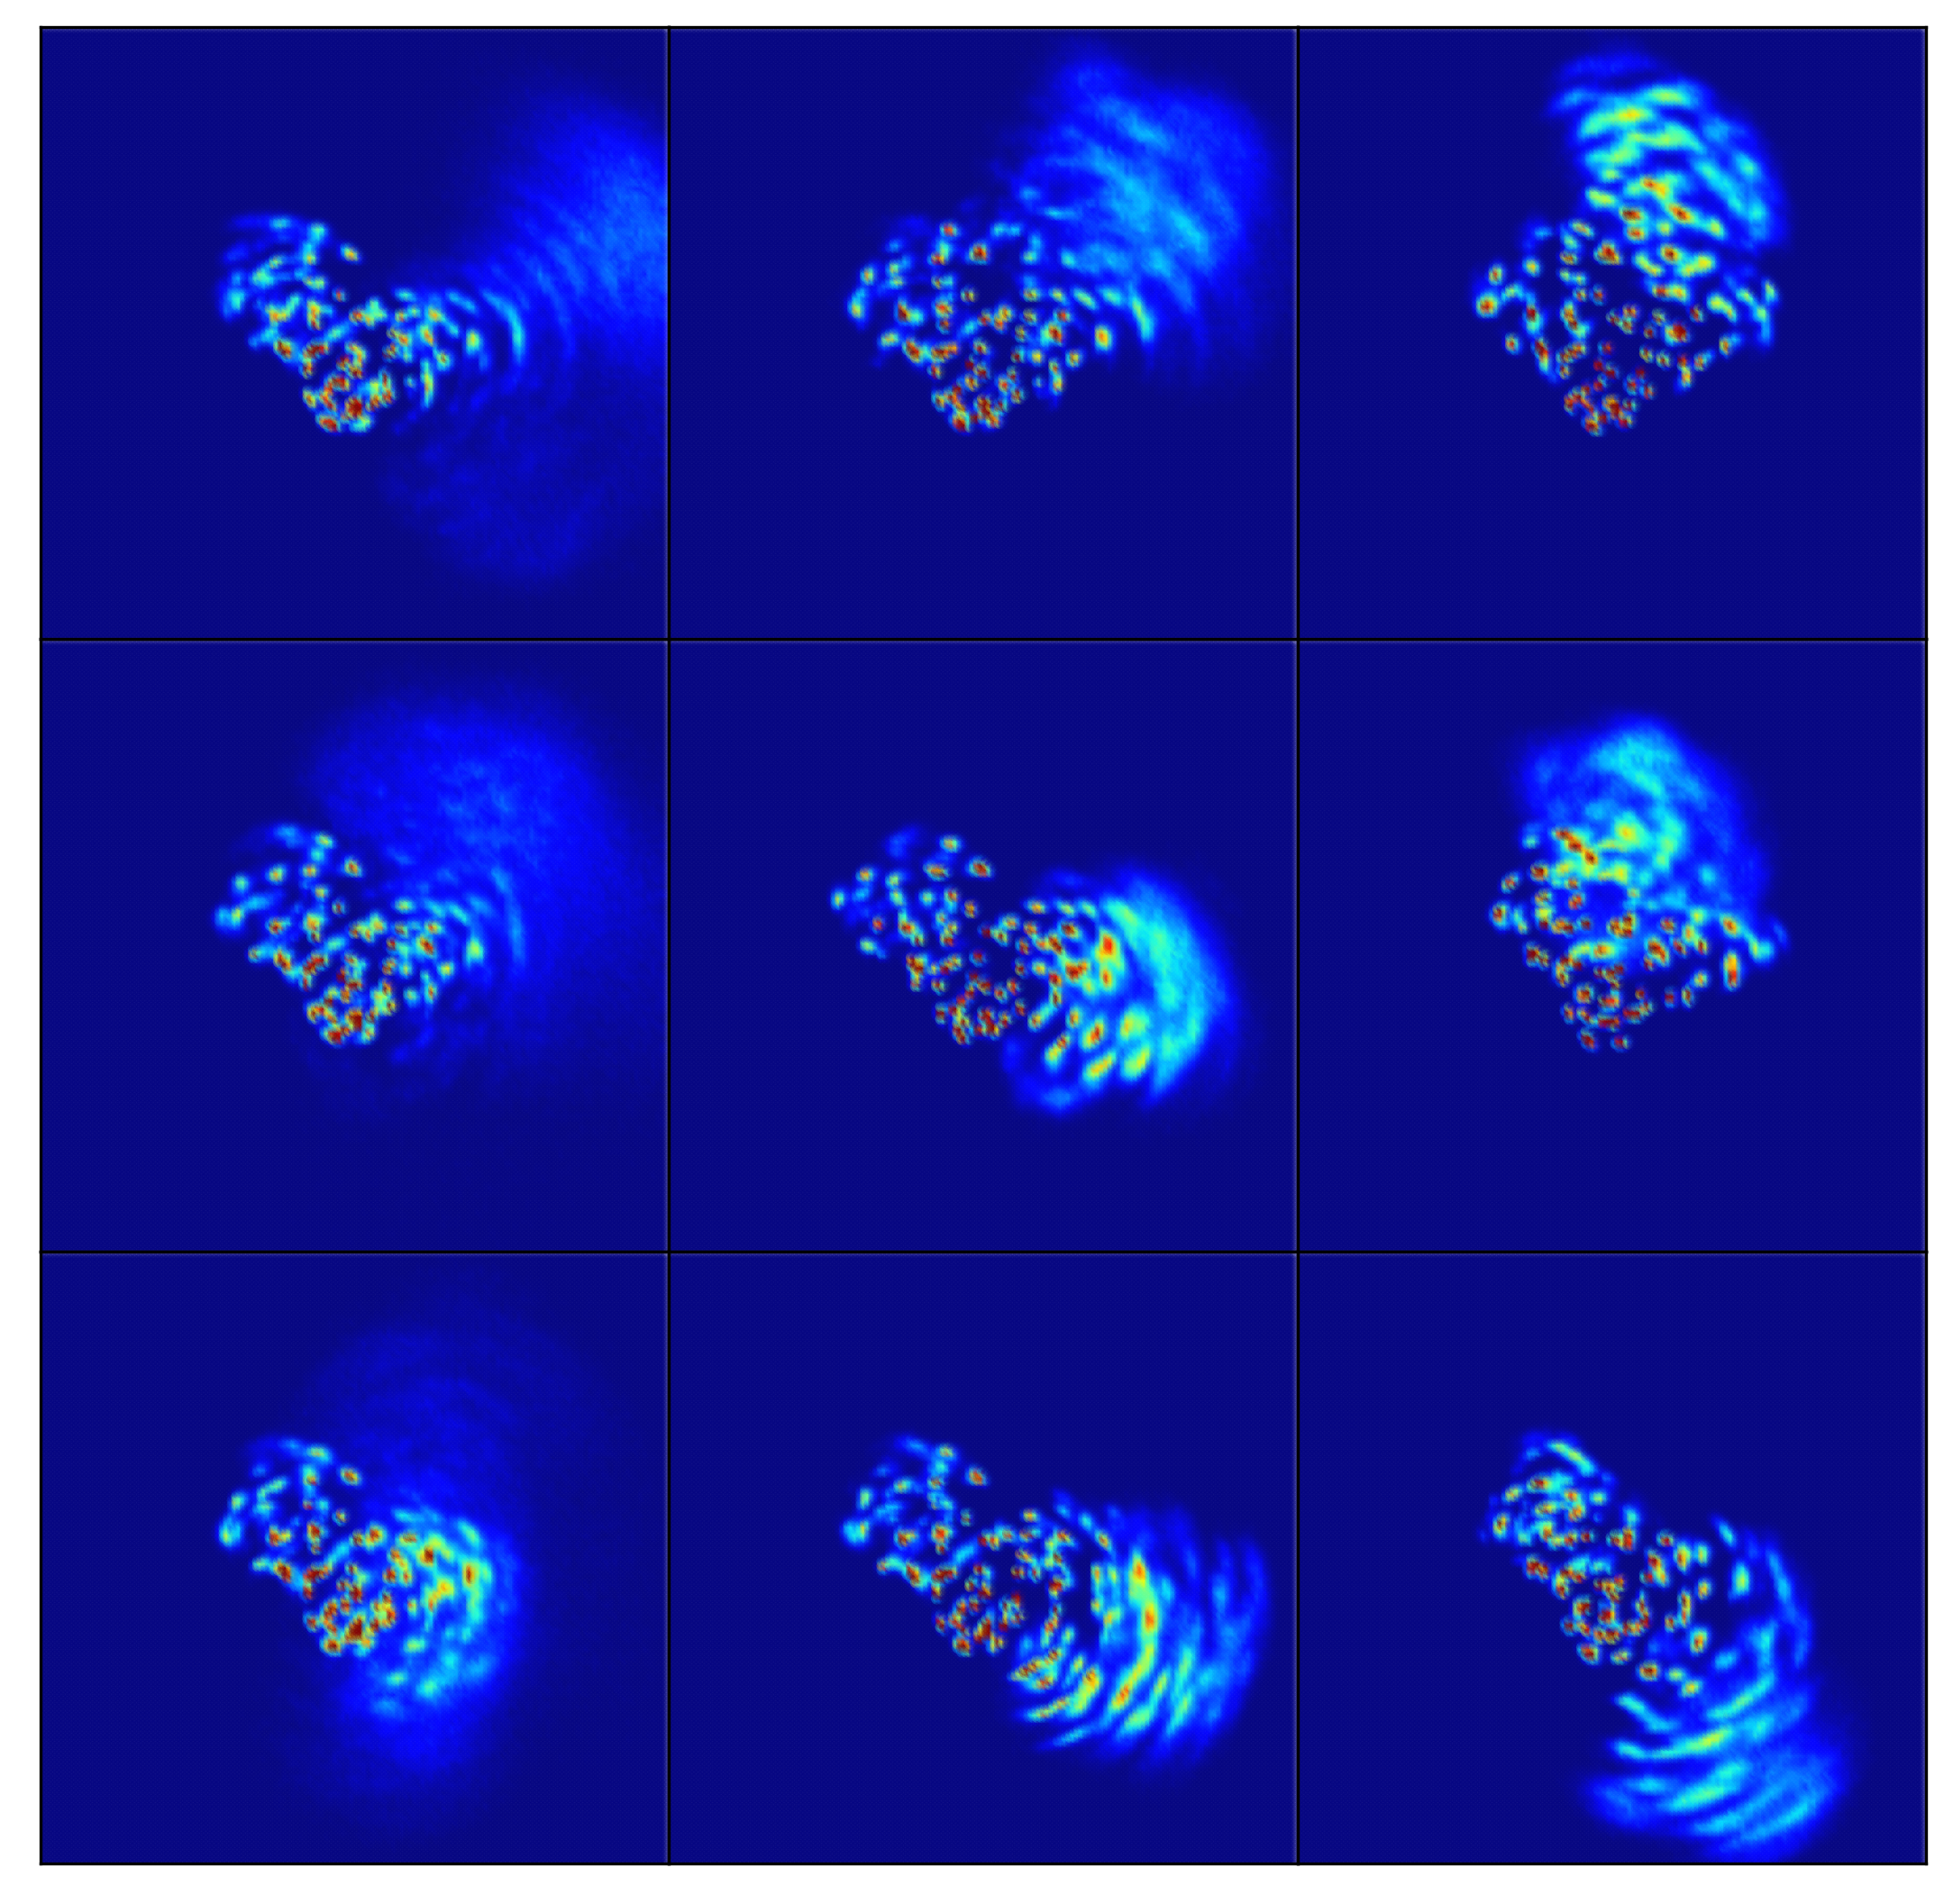

In [125]:
plt.figure(figsize=(9,9),dpi=300)
plt.subplot(3,3,4)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['WTLinker']['0Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,5)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['WTLinker']['2Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,6)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['WTLinker']['6Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,7)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['FlexLinker']['0Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,8)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['FlexLinker']['2Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,9)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['FlexLinker']['6Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,1)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['RigidLinker']['0Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,2)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['RigidLinker']['2Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,3)
plt.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['RigidLinker']['6Ca']/heavyMax,cmap="jet",vmin=0,vmax=0.3,alpha=0.3)
plt.xlim(0,150)
plt.ylim(0,150)
plt.xticks([])
plt.yticks([])

plt.subplots_adjust(wspace=0,hspace=0)

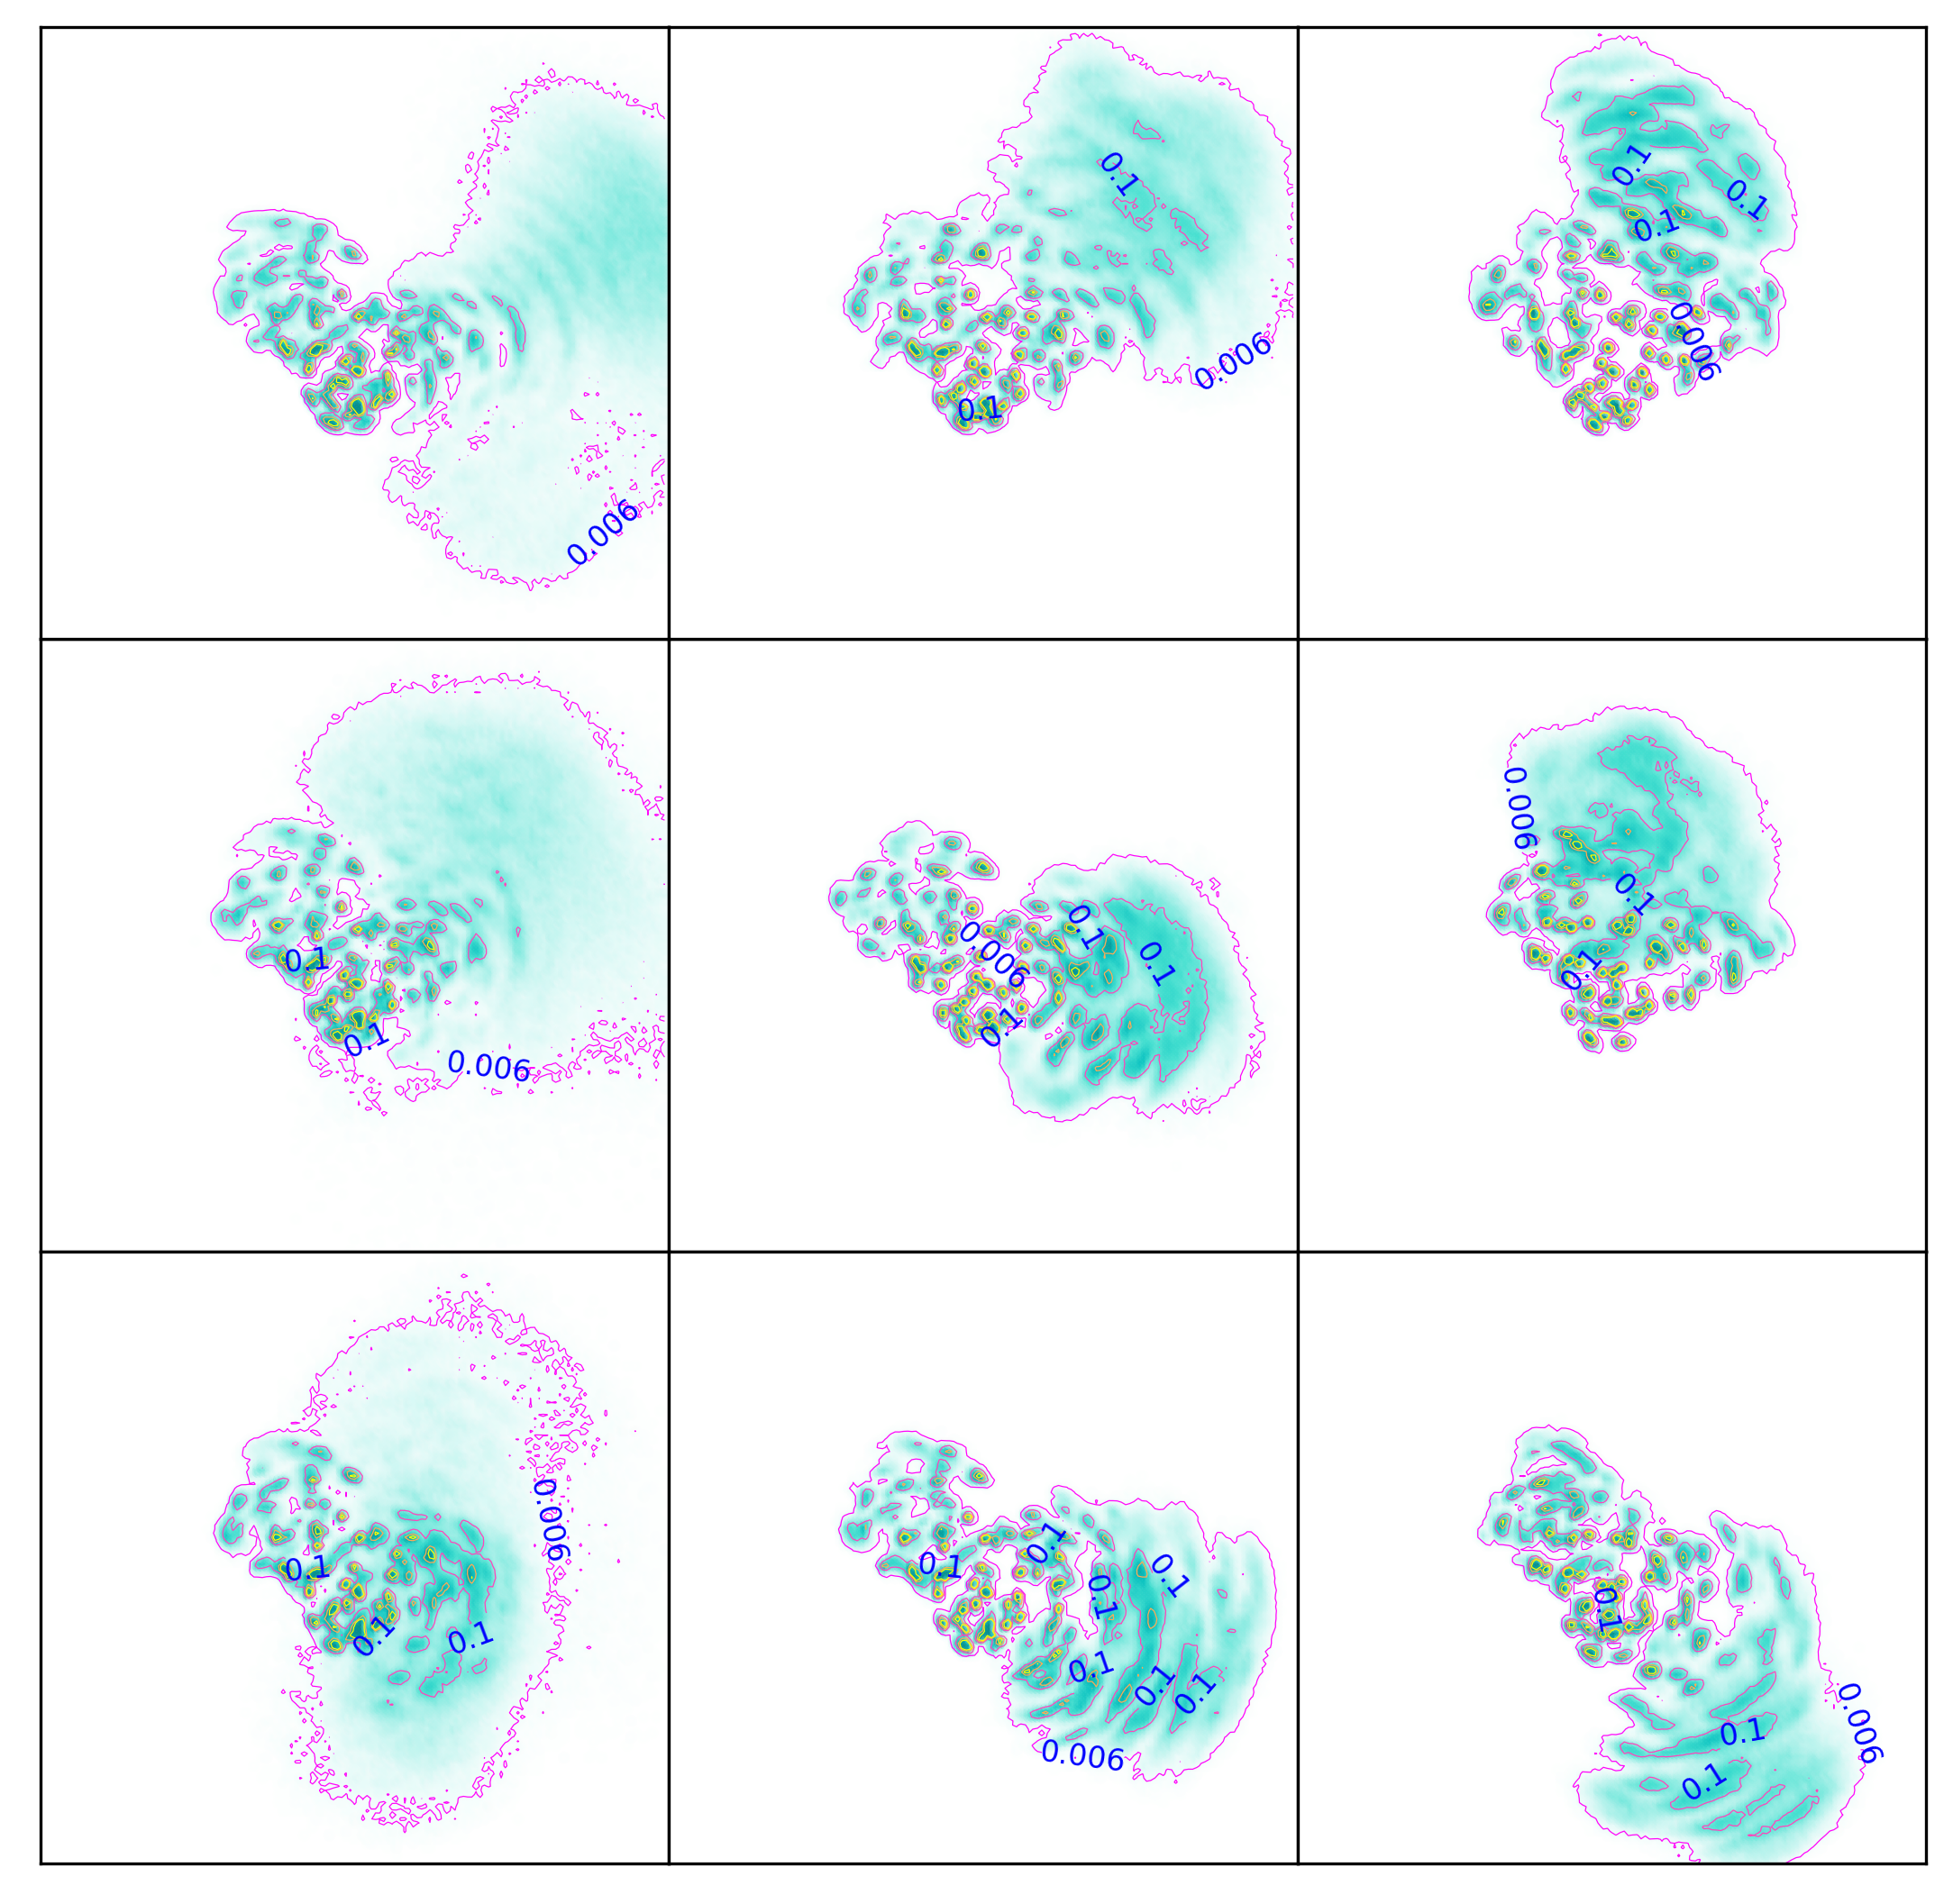

In [126]:
plt.figure(figsize=(9,9),dpi=300)
ax = plt.subplot(3,3,4)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['WTLinker']['0Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['WTLinker']['0Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])

ax = plt.subplot(3,3,5)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['WTLinker']['2Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['WTLinker']['2Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])


ax = plt.subplot(3,3,6)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['WTLinker']['6Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['WTLinker']['6Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])


ax = plt.subplot(3,3,7)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['FlexLinker']['0Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['FlexLinker']['0Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])

ax = plt.subplot(3,3,8)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['FlexLinker']['2Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['FlexLinker']['2Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])


ax = plt.subplot(3,3,9)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['FlexLinker']['6Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['FlexLinker']['6Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])

ax = plt.subplot(3,3,1)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['RigidLinker']['0Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['RigidLinker']['0Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])

ax = plt.subplot(3,3,2)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['RigidLinker']['2Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['RigidLinker']['2Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])


ax = plt.subplot(3,3,3)
ax.scatter(nx,ny, s=5,c=Pheavydata['Notarget']['RigidLinker']['6Ca']/heavyMax,cmap=cmap,vmin=0,vmax=0.3,alpha=0.3)

CS= ax.contour(nx,ny, Pheavydata['Notarget']['RigidLinker']['6Ca']/heavyMax,[0.006,0.081,0.2,0.3],\
            linewidths=0.3,cmap='spring',vmin=0,vmax=0.3)
fmt = {}
strs = ['0.006', '0.1', '0.2','0.4']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, CS.levels,fmt=fmt,fontsize=8,colors='blue')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([0,150])
ax.set_xlim([0,150])

plt.subplots_adjust(hspace=0.0,wspace=0.0)